In [18]:
import pickle

with open("./cache_data/filtered_tracks.pkl", "rb") as f:
    tracks = pickle.load(f)

In [20]:
import numpy as np
min([len(tracks[id]) for id in tracks])

2

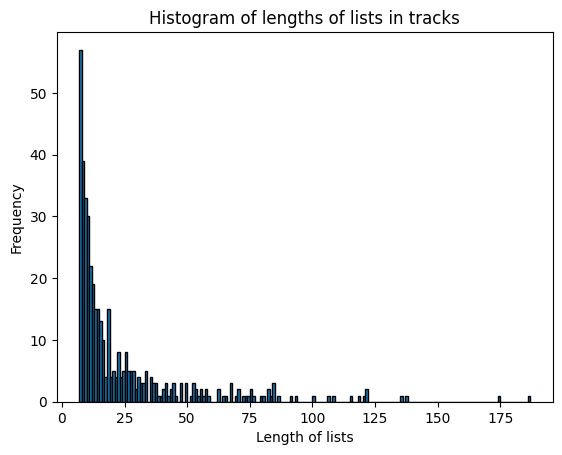

In [26]:
import matplotlib.pyplot as plt

# Extract the lengths of the lists for each key in tracks
lengths = [len(v) for v in tracks.values() if len(v) > 6]

# Plot the histogram
plt.hist(lengths, bins=range(min(lengths), max(lengths) + 1), edgecolor='black')
plt.xlabel('Length of lists')
plt.ylabel('Frequency')
plt.title('Histogram of lengths of lists in tracks')
plt.show()

In [60]:
from common.constants import PATH_TO_INPUT_FOLDER
from common.dataset import Dataset

rgb_txt = PATH_TO_INPUT_FOLDER + "/rgb.txt"
known_poses_txt = PATH_TO_INPUT_FOLDER + "/known_poses.txt"
orb_features_pkl_path = "./cache_data/orb_features.pkl"
pair_manager_pkl_path = "./cache_data/pair_manager.pkl"


dataset = Dataset()
id2known_poses = dataset.read_dict_of_lists(known_poses_txt)
id2imgpath = dataset.read_dict_of_lists(rgb_txt)
imgpath2known_poses = {
    id2imgpath[k]: id2known_poses[k] for k in id2imgpath if k in id2known_poses
}

id = 12
extracted_tracks = tracks[id]
img_path2point = {id2imgpath[img_id]: pt for img_id, pt in extracted_tracks}

In [61]:
img_path2point

{'rgb_with_poses/000000.png': array([261, 357], dtype=int32),
 'rgb_with_poses/000001.png': array([275, 336], dtype=int32),
 'rgb_with_poses/000003.png': array([268, 315], dtype=int32),
 'rgb_with_poses/000007.png': array([312, 312], dtype=int32),
 'rgb_with_poses/000009.png': array([308, 329], dtype=int32),
 'rgb_with_poses/000023.png': array([290, 316], dtype=int32),
 'rgb_with_poses/000035.png': array([314, 286], dtype=int32),
 'rgb_with_poses/000010.png': array([289, 355], dtype=int32),
 'rgb_with_poses/000016.png': array([285, 345], dtype=int32),
 'rgb_with_poses/000017.png': array([250, 351], dtype=int32),
 'rgb_with_poses/000021.png': array([291, 289], dtype=int32),
 'rgb_with_poses/000022.png': array([296, 300], dtype=int32),
 'rgb_with_poses/000024.png': array([288, 329], dtype=int32),
 'rgb_with_poses/000025.png': array([259, 376], dtype=int32),
 'rgb_with_poses/000034.png': array([258, 306], dtype=int32),
 'rgb_with_poses/000031.png': array([419, 138], dtype=int32),
 'rgb_wi

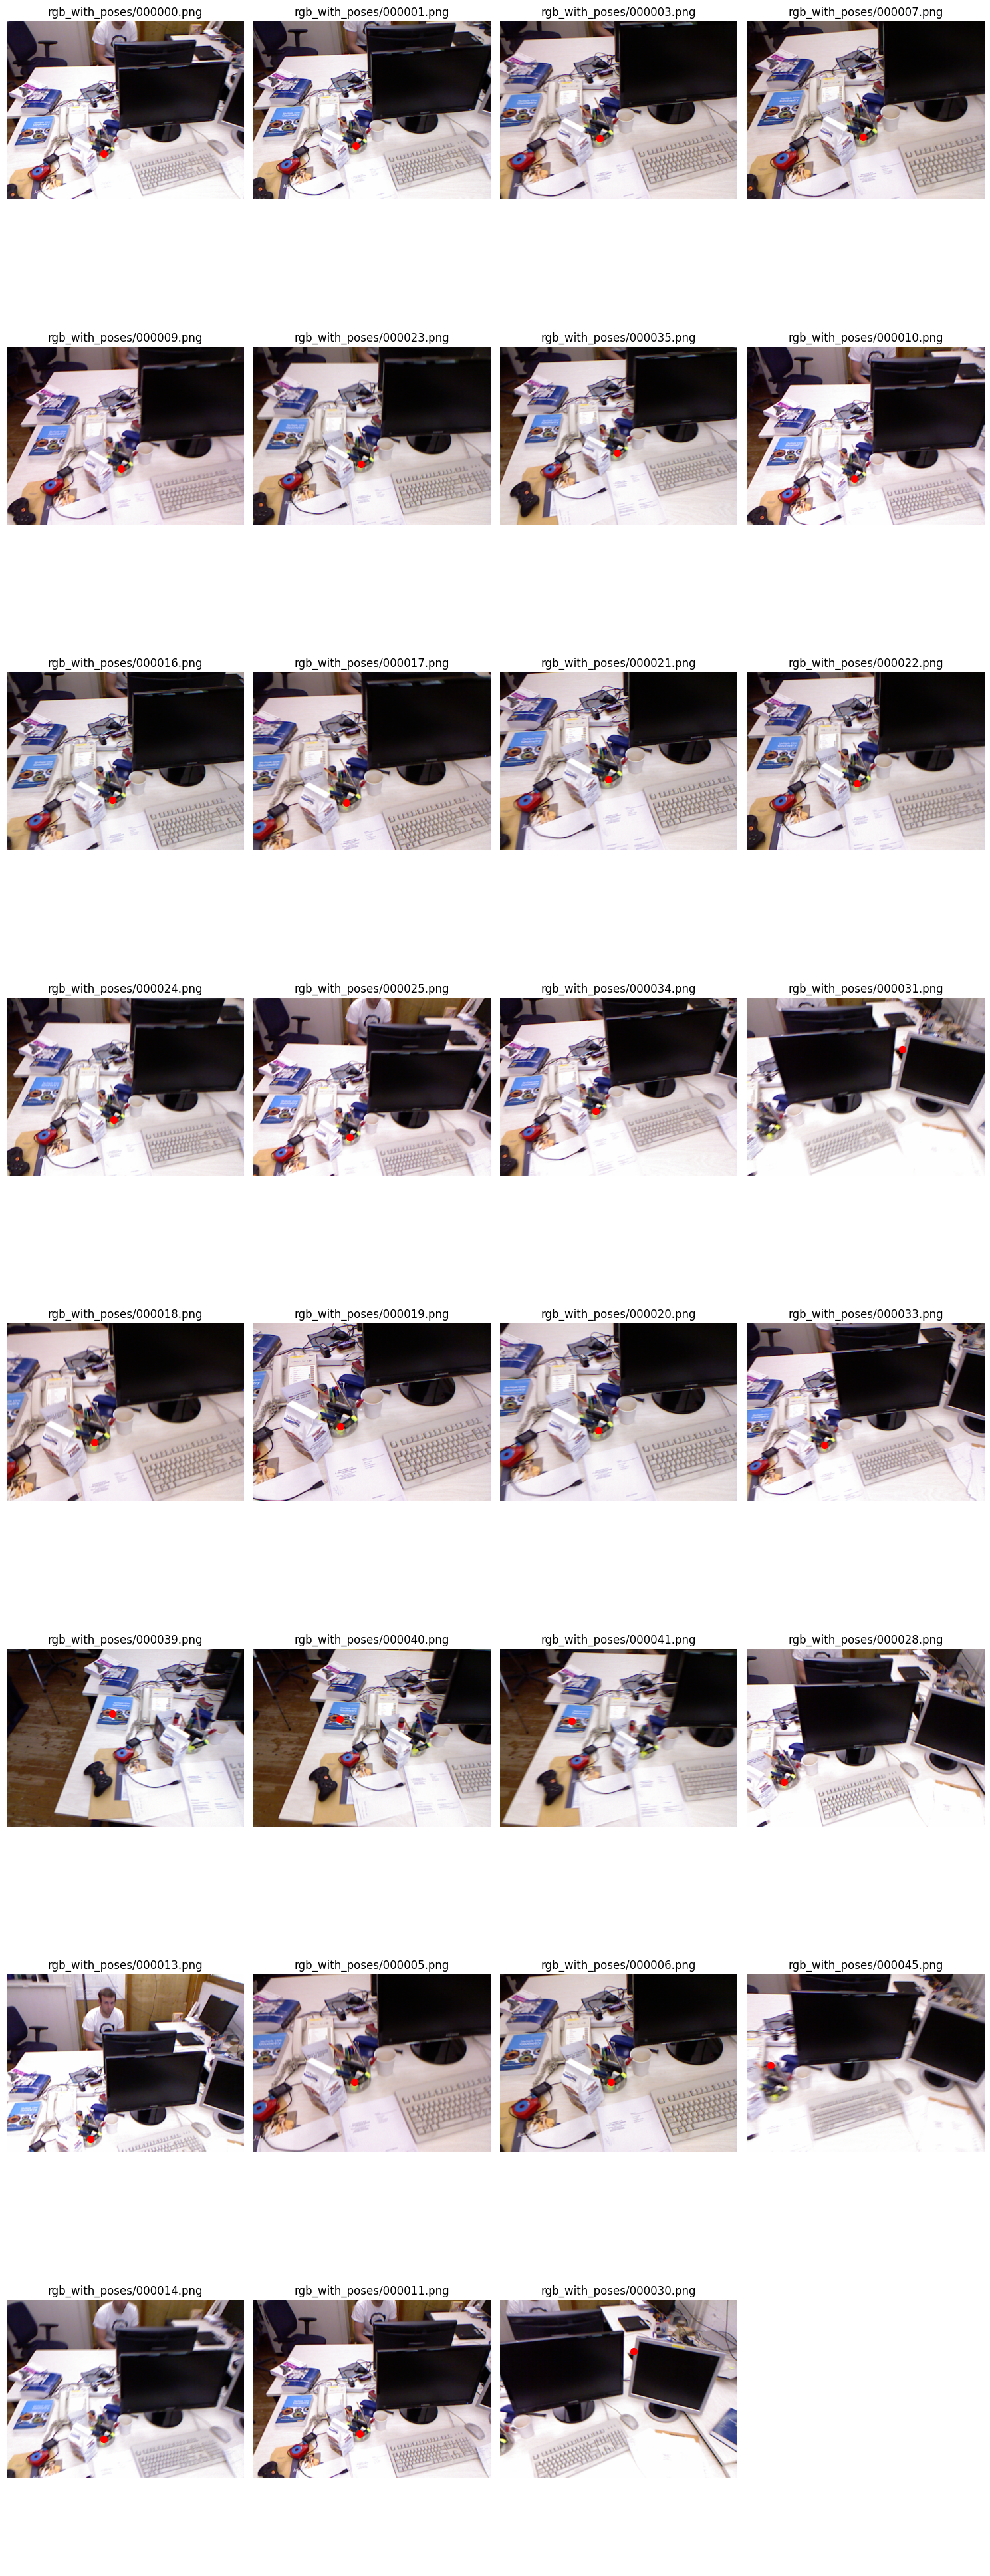

In [62]:
import cv2

import matplotlib.pyplot as plt

# Number of images per row
images_per_row = 4

# Calculate the number of rows needed
num_images = len(img_path2point)
num_rows = (num_images + images_per_row - 1) // images_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the images and points
for idx, (img_path, point) in enumerate(img_path2point.items()):
    # Read the image
    img = cv2.imread(PATH_TO_INPUT_FOLDER + '/' + img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Plot the image
    axes[idx].imshow(img)
    axes[idx].scatter(point[0], point[1], color='red', s=50)
    axes[idx].set_title(img_path)
    axes[idx].axis('off')

# Hide any remaining empty subplots
for i in range(num_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()